In [1]:
from Crypto.Hash import SHA256 
from Crypto.Cipher import AES
from Crypto.Util.Padding import  pad,unpad
from PIL import Image , ImageFilter
import numpy as np

In [2]:
data = '40131383-40125933'
sha256_hash = SHA256.new(data=data.encode()).hexdigest() 
sha256_hash

'd54fa0c07db7f94eac27a4745a1a545806c501e7fa6b1b8b471b67a8aeb12ca5'

In [3]:
key =  bytes.fromhex(sha256_hash[:int(128/4)])
iv =  bytes.fromhex(sha256_hash[int(128/4):])

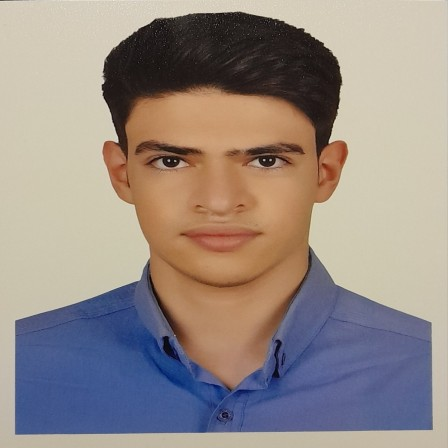

In [4]:
img = Image.open("image.png")
img

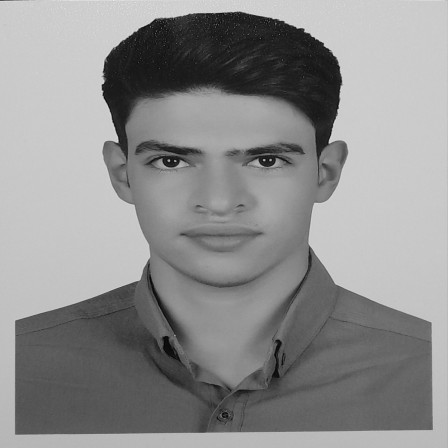

In [5]:
gray_image = img.convert("L")
gray_image

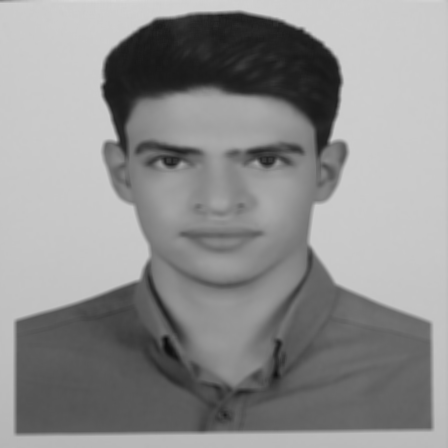

In [6]:
blur_strength = 2 
blurred_image = gray_image.filter(ImageFilter.BoxBlur(blur_strength))
blurred_image

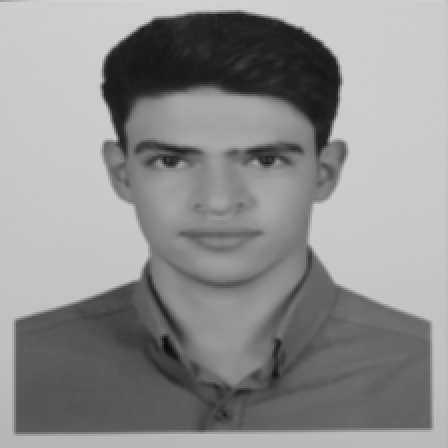

In [7]:
pixelation_factor = 2
small_image = blurred_image.resize(
    (blurred_image.width // pixelation_factor,
     blurred_image.height // pixelation_factor),
    Image.NEAREST
)
pixelated_image = small_image.resize(blurred_image.size, Image.NEAREST)
pixelated_image

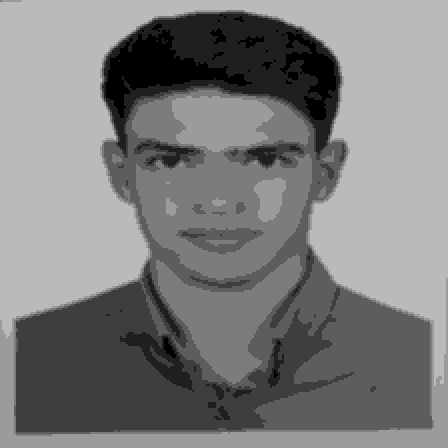

In [8]:
pixel_array = np.array(pixelated_image)


grayscale_levels = 8
scaled_pixels = (pixel_array / 255.0) * grayscale_levels
quantized_pixels = (scaled_pixels.astype(np.uint8) * (255 // grayscale_levels))  # Scale back to 0 - 255

processed_image = Image.fromarray(quantized_pixels)
processed_image.save('processed_image.png')
processed_image

In [9]:
data = quantized_pixels.tobytes()
original_shape = quantized_pixels.shape
print(original_shape)

(448, 448)


In [10]:
ecb_cipher = AES.new(key= key,mode= AES.MODE_ECB)
data_ecb_enc =  ecb_cipher.encrypt(data)

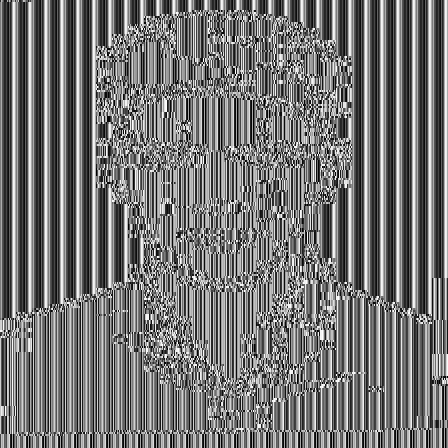

In [11]:
ecb_encrypted_array = np.frombuffer(data_ecb_enc, dtype=np.uint8)
ecb_encrypted_array = ecb_encrypted_array.reshape(original_shape)
ecb_encrypted_img = Image.fromarray(ecb_encrypted_array, mode="L")
ecb_encrypted_img.save("image_ecb_encrypted.png")
ecb_encrypted_img

In [12]:
cbc_cipher = AES.new(key=key,mode=AES.MODE_CBC,iv=iv)
data_cbc_enc =  cbc_cipher.encrypt(data)

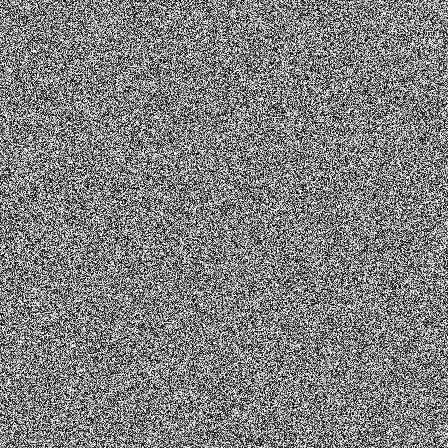

In [13]:
cbc_encrypted_array = np.frombuffer(data_cbc_enc, dtype=np.uint8).reshape(original_shape)
cbc_encrypted_img = Image.fromarray(cbc_encrypted_array, mode="L")
cbc_encrypted_img.save("image_cbc_encrypted.png")
cbc_encrypted_img

In [14]:
data_cbc_dec =  AES.new(key=key,mode=AES.MODE_CBC,iv=iv).decrypt(data_cbc_enc)

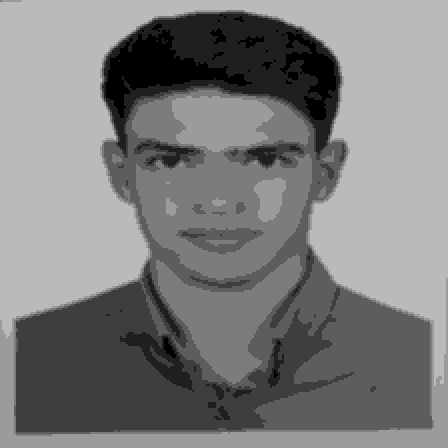

In [15]:
cbc_decrypted_array = np.frombuffer(data_cbc_dec, dtype=np.uint8).reshape(original_shape)
cbc_decrypted_img = Image.fromarray(cbc_decrypted_array, mode="L")
cbc_decrypted_img.save("image_cbc_decrypted.png")
cbc_decrypted_img

In [16]:
print('Match!') if SHA256.new(data=data).digest() == SHA256.new(data=data_cbc_dec).digest() else print("not match!")

Match!
